In [1]:
#importing libraries

from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [3]:
# reading in sod_summary_sra data as a data frame
df = pd.read_csv('/Users/kratipatidar/Desktop/prof_nara/data/sod_summary_sra.csv', parse_dates=['date_start', 'date_end'])
df.head()

,sra_id,sra_name,date_start,date_end,dev_count,dev_home,dev_parttime,dev_fulltime,dev_delivery,candidate_dev_count
0,1.0,CENTRAL SAN DIEGO,2020-01-01,2020-01-02,7203,2341,338,212,226,16505
1,1.0,CENTRAL SAN DIEGO,2020-01-02,2020-01-03,6897,2023,480,272,239,16505
2,1.0,CENTRAL SAN DIEGO,2020-01-03,2020-01-04,7213,2102,497,282,269,16505
3,1.0,CENTRAL SAN DIEGO,2020-01-04,2020-01-05,7037,2278,310,160,213,16505
4,1.0,CENTRAL SAN DIEGO,2020-01-05,2020-01-06,7221,2537,367,190,249,16505


In [4]:
#setting colors for sra regions
regions = df['sra_name'].unique()
len(regions)

customcolors = {}
import numpy as np
mycolors = np.array(list(mpl.colors.XKCD_COLORS.keys()))
for x, color in zip(regions,mycolors):
    customcolors[x] = color
customcolors = np.array(list(customcolors.values()))
customcolors


array(['xkcd:cloudy blue', 'xkcd:dark pastel green', 'xkcd:dust',
       'xkcd:electric lime', 'xkcd:fresh green', 'xkcd:light eggplant',
       'xkcd:nasty green', 'xkcd:really light blue', 'xkcd:tea',
       'xkcd:warm purple', 'xkcd:yellowish tan', 'xkcd:cement',
       'xkcd:dark grass green', 'xkcd:dusty teal', 'xkcd:grey teal',
       'xkcd:macaroni and cheese', 'xkcd:pinkish tan', 'xkcd:spruce',
       'xkcd:strong blue', 'xkcd:toxic green', 'xkcd:windows blue',
       'xkcd:blue blue', 'xkcd:blue with a hint of purple', 'xkcd:booger',
       'xkcd:bright sea green', 'xkcd:dark green blue',
       'xkcd:deep turquoise', 'xkcd:green teal', 'xkcd:strong pink',
       'xkcd:bland', 'xkcd:deep aqua', 'xkcd:lavender pink',
       'xkcd:light moss green', 'xkcd:light seafoam green',
       'xkcd:olive yellow', 'xkcd:pig pink', 'xkcd:deep lilac',
       'xkcd:desert', 'xkcd:dusty lavender', 'xkcd:purpley grey',
       'xkcd:purply', 'xkcd:candy pink'], dtype='<U31')

In [5]:
#Moving averages SRA
# aggregating data weekly
df_weekly = df.copy()
df_weekly.set_index('date_start', inplace=True)
df_weekly.head()

,sra_id,sra_name,date_end,dev_count,dev_home,dev_parttime,dev_fulltime,dev_delivery,candidate_dev_count
date_start,,,,,,,,,
2020-01-01,1.0,CENTRAL SAN DIEGO,2020-01-02,7203,2341,338,212,226,16505
2020-01-02,1.0,CENTRAL SAN DIEGO,2020-01-03,6897,2023,480,272,239,16505
2020-01-03,1.0,CENTRAL SAN DIEGO,2020-01-04,7213,2102,497,282,269,16505
2020-01-04,1.0,CENTRAL SAN DIEGO,2020-01-05,7037,2278,310,160,213,16505
2020-01-05,1.0,CENTRAL SAN DIEGO,2020-01-06,7221,2537,367,190,249,16505


In [9]:
#grouped dataframe with weekly mean

grouped_weekly_df = pd.DataFrame(df_weekly.groupby([pd.Grouper(freq='W'), 'sra_id', 'sra_name'])[['dev_count','dev_home','dev_parttime','dev_fulltime','dev_delivery']].mean()).reset_index()
grouped_weekly_df.head()

,date_start,sra_id,sra_name,dev_count,dev_home,dev_parttime,dev_fulltime,dev_delivery
0,2020-01-05,1.0,CENTRAL SAN DIEGO,7114.2,2256.2,398.4,223.2,239.2
1,2020-01-05,2.0,PENINSULA,2304.6,537.4,171.0,81.8,83.4
2,2020-01-05,3.0,CORONADO,1122.0,256.4,70.0,30.0,31.0
3,2020-01-05,4.0,NATIONAL CITY,2212.6,735.4,132.6,67.6,82.4
4,2020-01-05,5.0,SOUTHEASTERN SAN DIEGO,6703.4,2192.8,412.4,200.6,229.4


In [7]:
# reading in sod_summary_hhsa data as a data frame
h = pd.read_csv('sod_summary_hhsa.csv', parse_dates=['date_start', 'date_end'])
h.head()

FileNotFoundError: [Errno 2] No such file or directory: 'sod_summary_hhsa.csv'

In [10]:
#setting colors for hhsa regions
hhsa_regions= h['hhsa'].unique()
len(hhsa_regions)

customcolors_hhsa = {}
import numpy as np
mycolors = np.array(list(mpl.colors.XKCD_COLORS.keys()))
for x, color in zip(hhsa_regions,mycolors):
    customcolors_hhsa[x] = color
customcolors_hhsa = np.array(list(customcolors_hhsa.values()))
customcolors_hhsa

array(['xkcd:cloudy blue', 'xkcd:dark pastel green', 'xkcd:dust',
       'xkcd:electric lime', 'xkcd:fresh green', 'xkcd:light eggplant',
       'xkcd:nasty green'], dtype='<U22')

In [12]:
#Moving Averages HHSA
# aggregating data weekly
h_weekly = h.copy()
h_weekly.set_index('date_start', inplace=True)
h_weekly.head()

,hhsa_id,hhsa,date_end,dev_count,dev_home,dev_parttime,dev_fulltime,dev_delivery,candidate_dev_count
date_start,,,,,,,,,
2020-01-01,1.0,NORTH COASTAL,2020-01-02,26259,7656,1249,500,612,48497
2020-01-01,1.0,NORTH COASTAL,2020-01-02,26259,7656,1249,500,612,48497
2020-01-01,1.0,NORTH COASTAL,2020-01-02,26259,7656,1249,500,612,48497
2020-01-01,1.0,NORTH COASTAL,2020-01-02,26259,7656,1249,500,612,48497
2020-01-02,1.0,NORTH COASTAL,2020-01-03,25198,6385,1996,1023,714,48497


In [13]:
#grouped dataframe with weekly mean

grouped_weekly_hhsa = pd.DataFrame(h_weekly.groupby([pd.Grouper(freq='W'), 'hhsa_id', 'hhsa'])[['dev_count','dev_home','dev_parttime','dev_fulltime','dev_delivery']].mean()).reset_index()
grouped_weekly_hhsa.head()

,date_start,hhsa_id,hhsa,dev_count,dev_home,dev_parttime,dev_fulltime,dev_delivery
0,2020-01-05,1.0,NORTH COASTAL,25558.2,6925.8,1633.6,717.0,698.8
1,2020-01-05,2.0,NORTH CENTRAL,27899.8,7492.8,1855.4,908.6,802.4
2,2020-01-05,3.0,CENTRAL,20255.4,6420.6,1240.4,662.4,698.8
3,2020-01-05,4.0,SOUTH,22880.4,6854.4,1387.0,656.4,716.6
4,2020-01-05,5.0,EAST,25002.8,7545.2,1655.6,722.4,739.6


In [14]:
# dropping rows with nans
df.dropna(inplace=True)
grouped_weekly_df.dropna(inplace=True)
h.dropna(inplace=True)
grouped_weekly_hhsa.dropna(inplace=True)

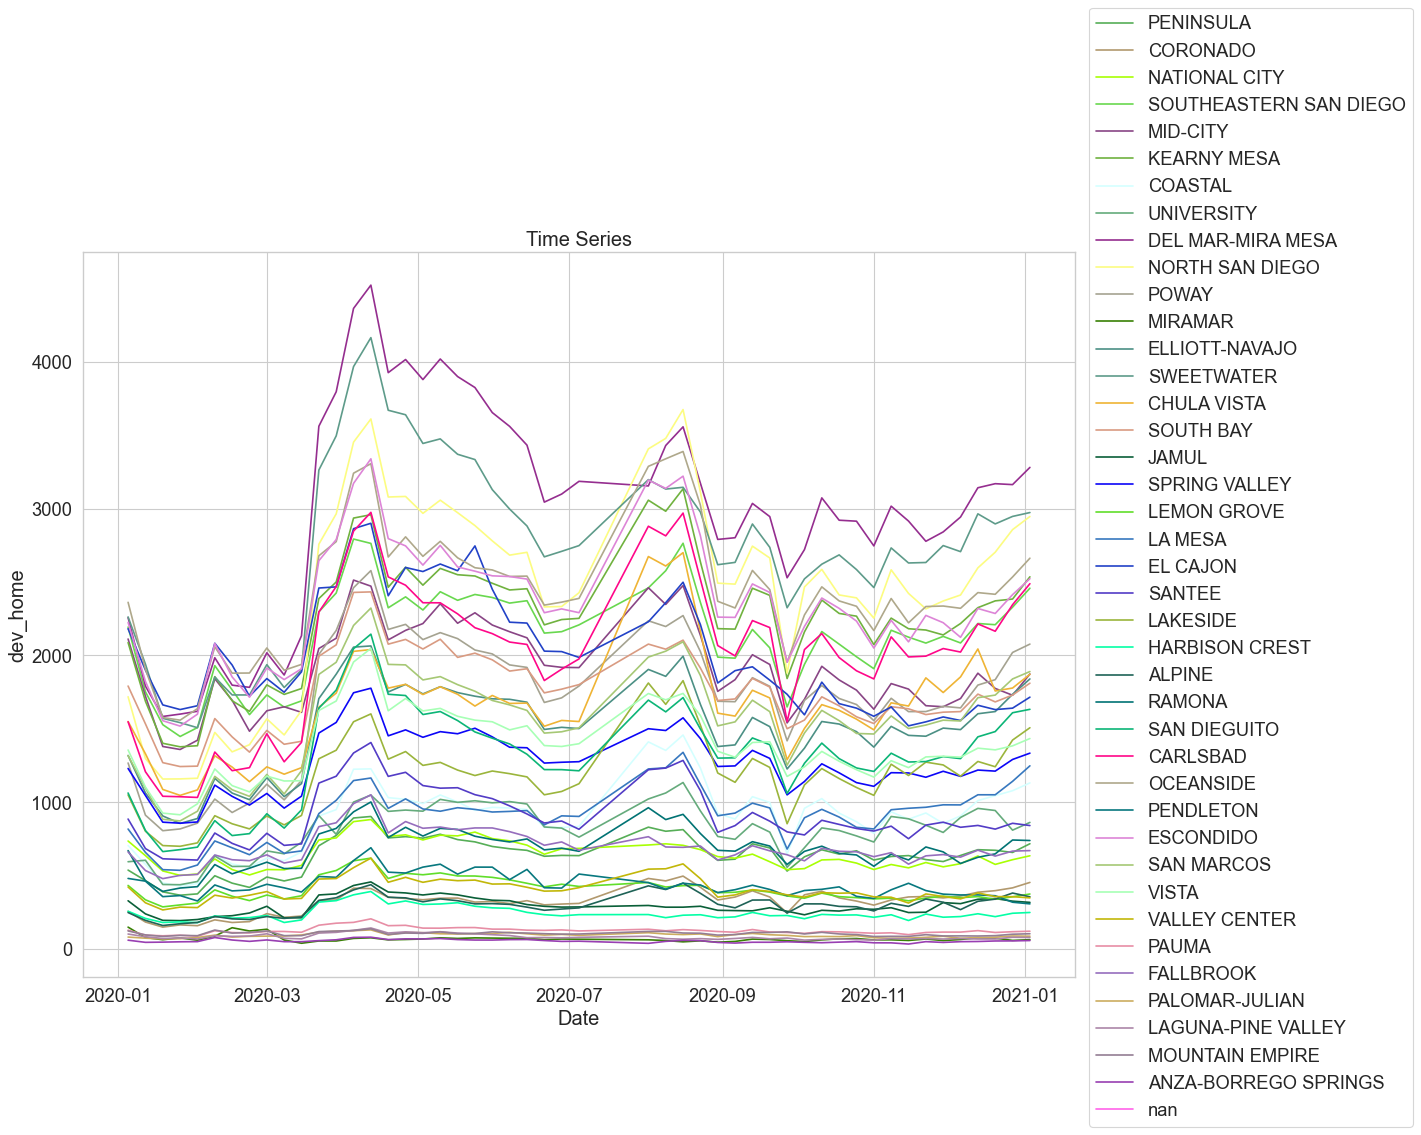

In [11]:
#Code For Plotting Time Series for SRA and HHSA

#Parameters of plot_time_series are- col (column of a dataframe),
#areas(unique sra or hhsa regions represented by regions(sra), hhsa_regions(hhsa)), cdf(sra or hhsa dataframe),
#area_name(sra or hhsa name column), custom(custom colors for specific sra and hhsa regions)

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

#setting up plot
plt.figure(figsize=(16,12), dpi= 80) 

#Plotting the daily series
def plot_time_series(col,areas,cdf,area_name,custom):
    for i, y in enumerate(areas):
        if i > 0:
            plt.plot('date_start', col, data=cdf.loc[area_name == y, :], color=custom[i], label=y)
            plt.legend(loc= 'best', bbox_to_anchor = (1.35,1.35))
            plt.xlabel('Date')
            plt.ylabel(col)
            plt.title('Time Series')
                
plot_time_series('dev_home', regions, grouped_weekly_df, grouped_weekly_df.sra_name, customcolors)

In [21]:
# reading in the covid cases file
df_covid = pd.read_csv('sra_cases.csv', parse_dates=['date'])
df_covid.head()

,sra,name,date,raw_cases,rate,case0,case_diff
0,38,ALPINE,2020-04-01,0.091,NaN,NaN,NaN
1,38,ALPINE,2020-04-02,0.980,NaN,0.091,0.889
2,38,ALPINE,2020-04-03,1.010,NaN,0.980,0.030
3,38,ALPINE,2020-04-04,1.010,NaN,1.010,0.000
4,38,ALPINE,2020-04-05,1.020,NaN,1.010,0.010


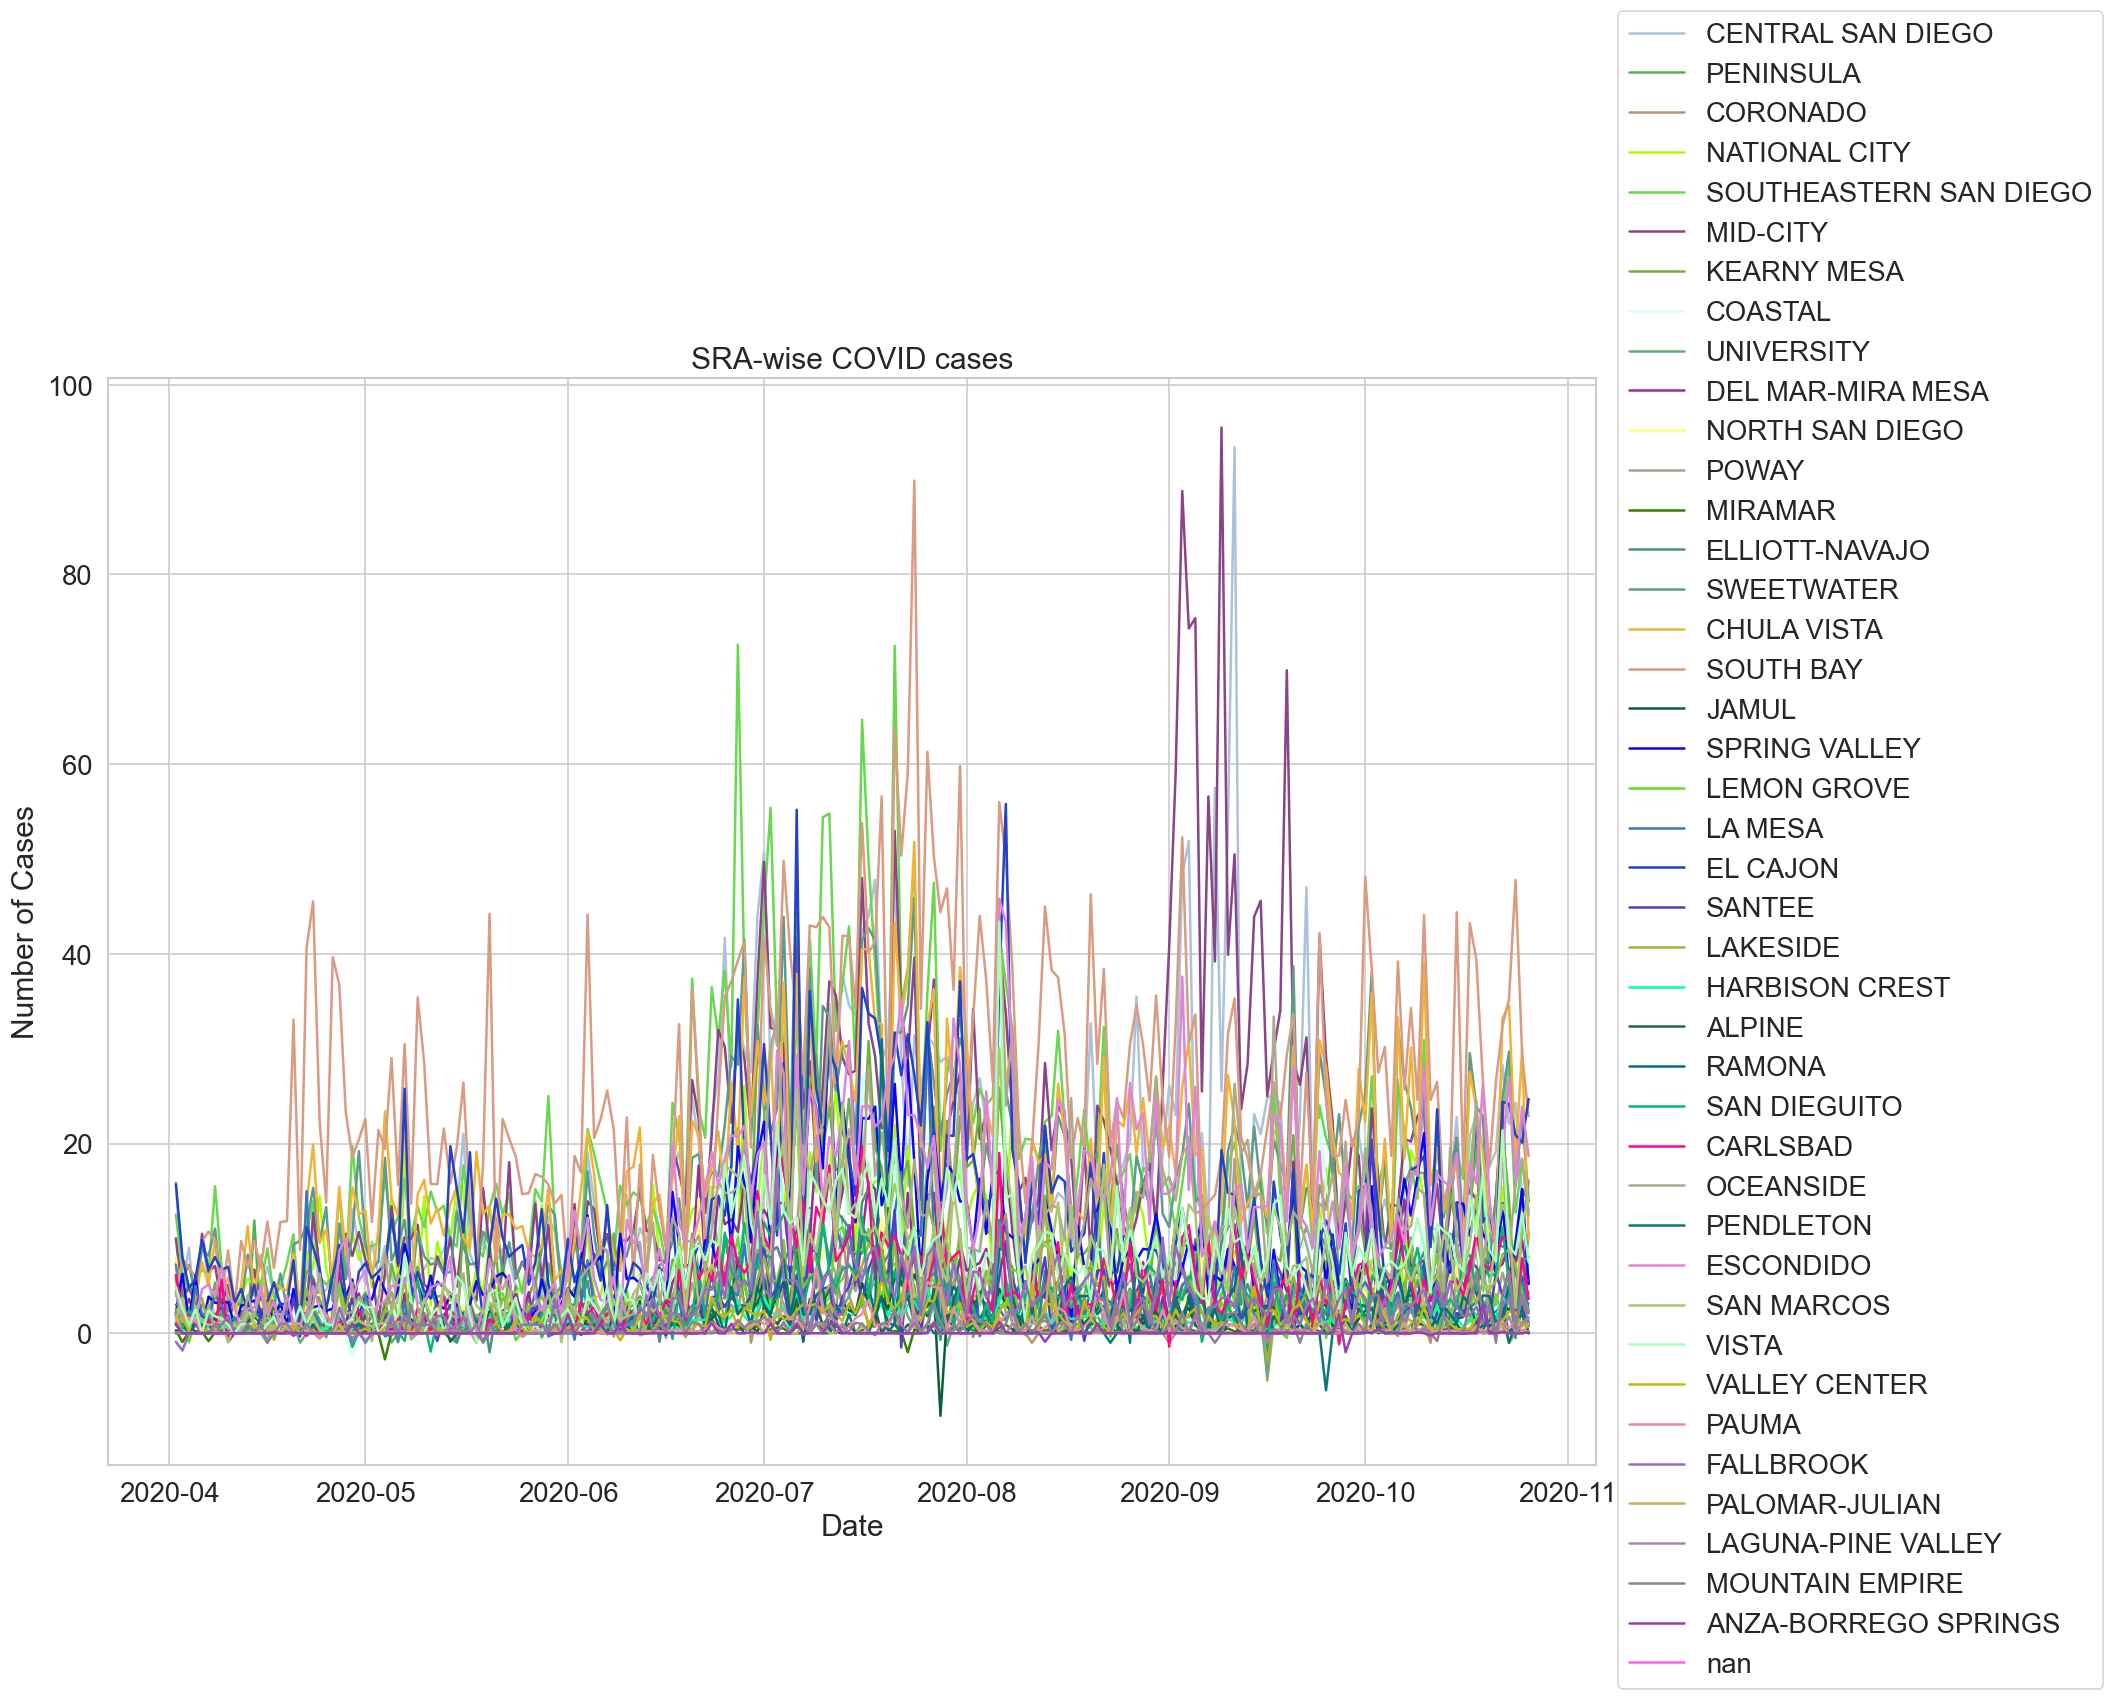

In [25]:
# # Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

#setting up plot
plt.figure(figsize=(16,12), dpi= 120)

#function for plot
for i,c in enumerate(regions):
    plt.plot('date', 'case_diff', data= df_covid.loc[df_covid.name == c, :], color = customcolors[i],label=c)
    plt.legend(loc= 'best', bbox_to_anchor = (1.35,1.35))
    #plt.ylim(0,500)
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.title('SRA-wise COVID cases')

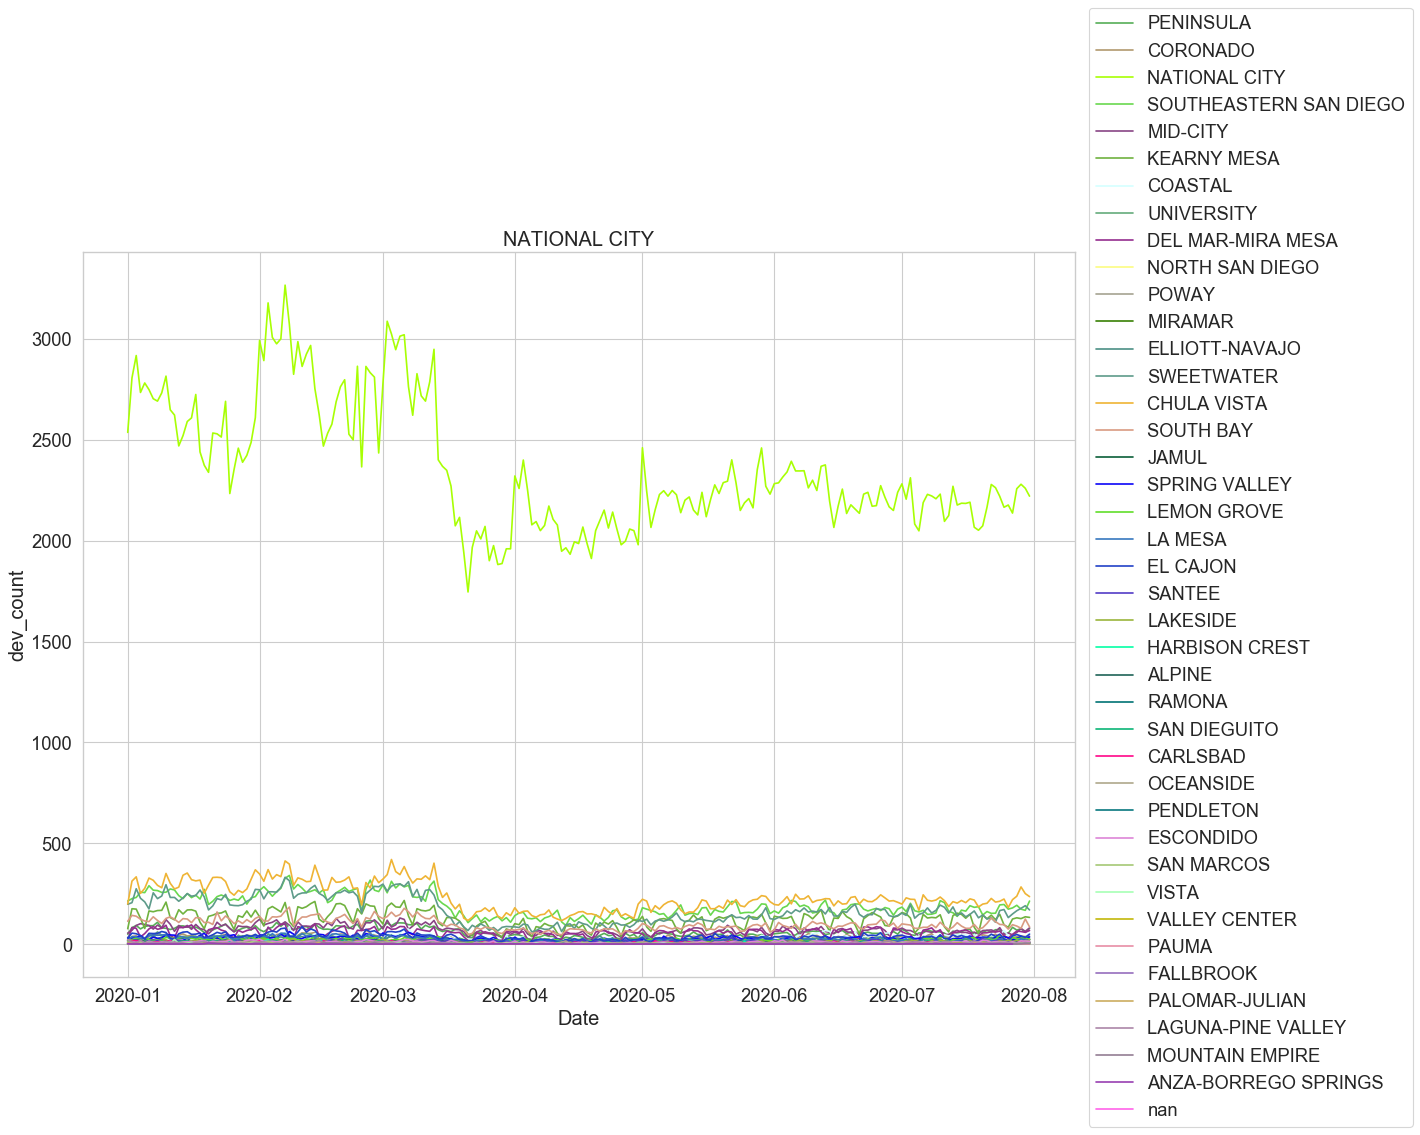

In [30]:
 #Plotting time series for sod_od_sra
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

#setting up plot
plt.figure(figsize=(16,12), dpi= 80) 

#Plotting the daily series
def plot_time_series(origin,areas,custom):
    for i,y in enumerate(destinations):
        if i>0:
            sub_df= df_od.loc[df_od.sra_name_orig== origin]
            plt.plot('date_start', 'dev_count', data=sub_df.loc[sub_df.sra_name_dest == y, :], color=custom[i], label=y)
            plt.legend(loc= 'best', bbox_to_anchor = (1.35,1.35))
            plt.xlabel('Date')
            plt.ylabel('dev_count')
            plt.title(origin)
            
plot_time_series('NATIONAL CITY', regions,customcolors)

In [12]:
#reading in sod_od_sra
df_od_hhsa = pd.read_csv('F:/MobilityData/sod_od_hhsa_new1.csv', parse_dates=['date_start', 'date_end'])
df_od_hhsa.head()

,hhsa_orig,hhsa_dest,hhsa_name_orig,hhsa_name_dest,date_start,date_end,dev_count
0,1.0,1.0,NORTH COASTAL,NORTH COASTAL,2020-01-01,2020-01-02,39265
1,1.0,2.0,NORTH COASTAL,NORTH CENTRAL,2020-01-01,2020-01-02,1461
2,1.0,3.0,NORTH COASTAL,CENTRAL,2020-01-01,2020-01-02,961
3,1.0,4.0,NORTH COASTAL,SOUTH,2020-01-01,2020-01-02,244
4,1.0,5.0,NORTH COASTAL,EAST,2020-01-01,2020-01-02,242


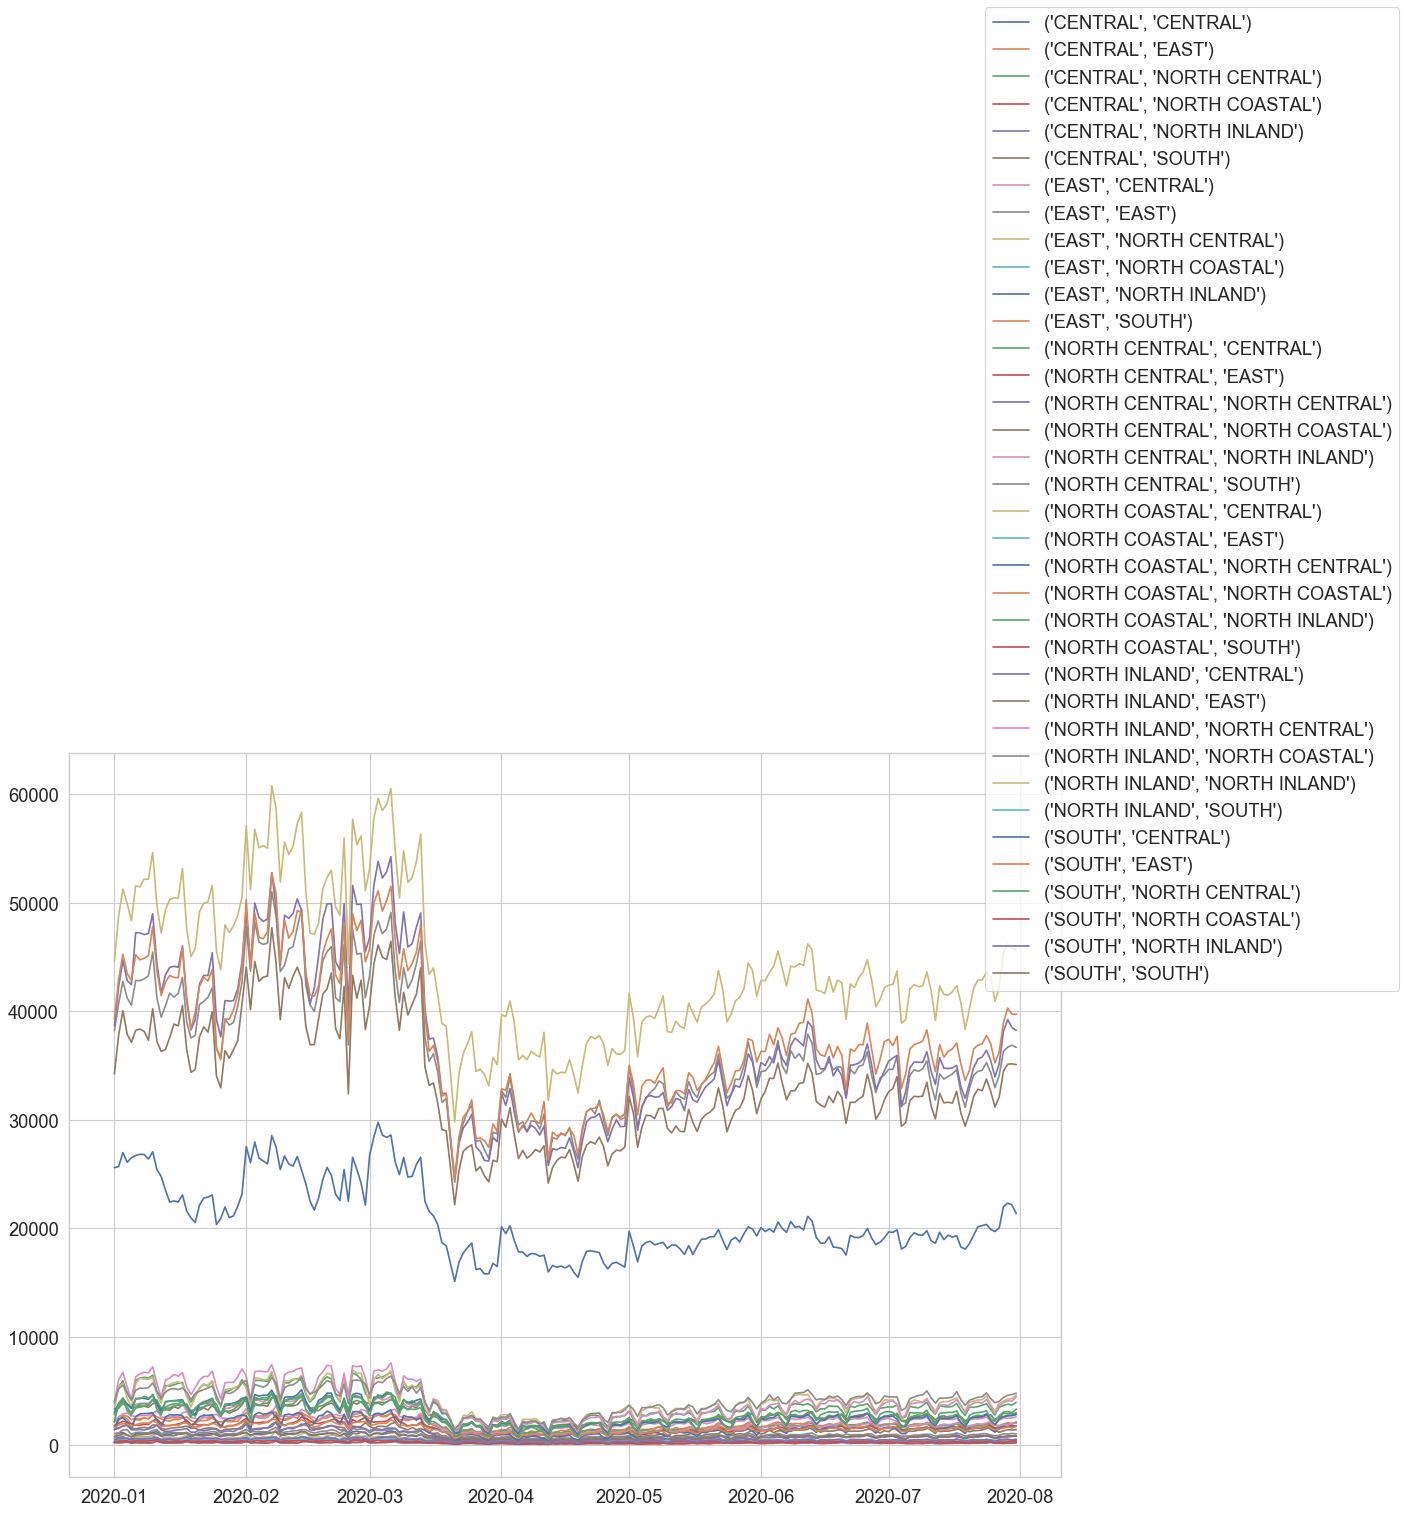

In [13]:
#Plotting time series for sod_od_hhsa
by_label = df_od_hhsa.groupby(['hhsa_name_orig','hhsa_name_dest'])

plt.figure(figsize=(16,12), dpi= 80)

for name, group in by_label:
    plt.plot(group['date_start'], group['dev_count'], label=name)

plt.legend(loc = 'right', bbox_to_anchor = (1.35,1.35))
plt.show()


In [6]:
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [11]:
config = hex_config
%run hex_config.py

# Load a map with data and config and height
from keplergl import KeplerGl
map_2 = KeplerGl(height=400, data={"data_1": df}, config=config)
map_2

NameError: name 'hex_config' is not defined

In [14]:
map_1.add_data(data=df, name='data_1')
map_1

KeplerGl(data={'data_1': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, …